

*   Hanif Azil Siroot 1301194189
*   Masayu Anandita Prameswari 1301194434




**Formulasi Masalah**

Dalam tugas Clustering ini kami menggunakan file dari dataset yang bernama kendaraan_train.csv dan kendaraan_test.csv. Data tersebut memiliki beberapa atribut yaitu id, Jenis_Kelamin, Umur, SIM, Kode_Daerah, Sudah_Asuransi, Umur_Kendaraan, Kendaraan_Rusak, Premi, Kanal_Penjualan, Lama_Berlangganan, Tertarik. Jumlah data didalam dataset tersebut berjumlah 285.831 records. Pada tugas ke-2 ini akan dilakukan Classification untuk memprediksi apakah pelanggan tertarik untuk membeli kendaraan baru atau tidak berdasarkan data pelanggan yang ada.

##Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Model yang akan dibandingkan
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB #Untuk membandingkan akurasi dari from scratch dengan library
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

## Assigning Dataset Kendaraan_Train

In [ ]:
#Import Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Preprocessing data kendaraan_train

In [ ]:
# Read Data CSV
data_train = pd.read_csv("/kendaraan_train.csv")
data_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0.0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0.0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0.0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0.0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
119204,119205,Pria,50.0,1.0,30.0,0.0,1-2 Tahun,Pernah,2630.0,160.0,177.0,0.0
119205,119206,Pria,62.0,1.0,8.0,0.0,1-2 Tahun,Pernah,65885.0,26.0,176.0,0.0
119206,119207,Wanita,63.0,1.0,28.0,0.0,1-2 Tahun,Pernah,NaN,124.0,126.0,0.0
119207,119208,Wanita,24.0,1.0,3.0,0.0,< 1 Tahun,Pernah,19442.0,152.0,221.0,0.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_train.count()

id                   119209
Jenis_Kelamin        113122
Umur                 113336
SIM                  113148
Kode_Daerah          113265
Sudah_Asuransi       113151
Umur_Kendaraan       113213
Kendaraan_Rusak      113274
Premi                113240
Kanal_Penjualan      113250
Lama_Berlangganan    113393
Tertarik             119208
dtype: int64

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119209 entries, 0 to 119208
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 119209 non-null  int64  
 1   Jenis_Kelamin      113122 non-null  object 
 2   Umur               113336 non-null  float64
 3   SIM                113148 non-null  float64
 4   Kode_Daerah        113265 non-null  float64
 5   Sudah_Asuransi     113151 non-null  float64
 6   Umur_Kendaraan     113213 non-null  object 
 7   Kendaraan_Rusak    113274 non-null  object 
 8   Premi              113240 non-null  float64
 9   Kanal_Penjualan    113250 non-null  float64
 10  Lama_Berlangganan  113393 non-null  float64
 11  Tertarik           119208 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 10.9+ MB


In [ ]:
#Drop column id
df_train = data_train.drop('id', axis=1)

In [ ]:
df_train.columns

Index(['Jenis_Kelamin', 'Umur', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi',
       'Umur_Kendaraan', 'Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan',
       'Lama_Berlangganan', 'Tertarik'],
      dtype='object')

In [ ]:
df_train.shape

(119209, 11)

In [ ]:
df_train.groupby("Tertarik").count()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
Tertarik,,,,,,,,,,
0.0,99291,99476,99349,99394,99350,99366,99450,99426,99390,99522
1.0,13831,13860,13799,13871,13801,13847,13824,13814,13860,13871


In [ ]:
# Check missing data 1
missing_data_train = df_train.isnull()
missing_data_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
119204,False,False,False,False,False,False,False,False,False,False,False
119205,False,False,False,False,False,False,False,False,False,False,False
119206,False,False,False,False,False,False,False,True,False,False,False
119207,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
for column in missing_data_train.columns.values.tolist():
    print(column)
    print(missing_data_train[column].value_counts())
    print('')

Jenis_Kelamin
False    113122
True       6087
Name: Jenis_Kelamin, dtype: int64

Umur
False    113336
True       5873
Name: Umur, dtype: int64

SIM
False    113148
True       6061
Name: SIM, dtype: int64

Kode_Daerah
False    113265
True       5944
Name: Kode_Daerah, dtype: int64

Sudah_Asuransi
False    113151
True       6058
Name: Sudah_Asuransi, dtype: int64

Umur_Kendaraan
False    113213
True       5996
Name: Umur_Kendaraan, dtype: int64

Kendaraan_Rusak
False    113274
True       5935
Name: Kendaraan_Rusak, dtype: int64

Premi
False    113240
True       5969
Name: Premi, dtype: int64

Kanal_Penjualan
False    113250
True       5959
Name: Kanal_Penjualan, dtype: int64

Lama_Berlangganan
False    113393
True       5816
Name: Lama_Berlangganan, dtype: int64

Tertarik
False    119208
True          1
Name: Tertarik, dtype: int64



In [ ]:
# Check missing data 2
df_train.isna().sum()

Jenis_Kelamin        6087
Umur                 5873
SIM                  6061
Kode_Daerah          5944
Sudah_Asuransi       6058
Umur_Kendaraan       5996
Kendaraan_Rusak      5935
Premi                5969
Kanal_Penjualan      5959
Lama_Berlangganan    5816
Tertarik                1
dtype: int64

In [ ]:
# Change value Categorical Columns
df_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0.0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0.0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0.0


In [ ]:
to_number_value = {'Wanita': 0, 'Pria': 1}
df_train = df_train.replace({'Jenis_Kelamin': to_number_value})

to_number_value = {'Tidak': 0, 'Pernah': 1}
df_train = df_train.replace({'Kendaraan_Rusak': to_number_value})

to_number_value = {'< 1 Tahun': 0, '1-2 Tahun': 1, '> 2 Tahun': 2}
df_train = df_train.replace({'Umur_Kendaraan': to_number_value})

In [ ]:
df_train.dtypes

Jenis_Kelamin        float64
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan       float64
Kendaraan_Rusak      float64
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik             float64
dtype: object

In [ ]:
df_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0.0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0.0
2,NaN,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0.0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0,0.0
4,1.0,50.0,1.0,35.0,0.0,2.0,NaN,34857.0,88.0,194.0,0.0


In [ ]:
# Missing Value Handling
df_train['Umur']

0         30.0
1         48.0
2         21.0
3         58.0
4         50.0
          ... 
119204    50.0
119205    62.0
119206    63.0
119207    24.0
119208     NaN
Name: Umur, Length: 119209, dtype: float64

In [ ]:
# Mode
df_train['Jenis_Kelamin'] = df_train['Jenis_Kelamin'].replace(np.nan, df_train['Jenis_Kelamin'].mode()[0])
df_train['SIM'] = df_train['SIM'].replace(np.nan, df_train['SIM'].mode()[0])
df_train['Kode_Daerah'] = df_train['Kode_Daerah'].replace(np.nan, df_train['Kode_Daerah'].mode()[0])
df_train['Sudah_Asuransi'] = df_train['Sudah_Asuransi'].replace(np.nan, df_train['Sudah_Asuransi'].mode()[0])
df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].replace(np.nan, df_train['Umur_Kendaraan'].mode()[0])
df_train['Kendaraan_Rusak'] = df_train['Kendaraan_Rusak'].replace(np.nan, df_train['Kendaraan_Rusak'].mode()[0])

# Mean
df_train['Umur'] = df_train['Umur'].replace(np.nan, df_train['Umur'].mean()) 
df_train['Premi'] = df_train['Premi'].replace(np.nan, df_train['Premi'].mean())
df_train['Kanal_Penjualan'] = df_train['Kanal_Penjualan'].replace(np.nan, df_train['Kanal_Penjualan'].mean())
df_train['Lama_Berlangganan'] = df_train['Lama_Berlangganan'].replace(np.nan, df_train['Lama_Berlangganan'].mean())

In [ ]:
df_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0.0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0.0
2,1.0,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0.0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0,0.0
4,1.0,50.0,1.0,35.0,0.0,2.0,1.0,34857.0,88.0,194.0,0.0


In [ ]:
#Pemabagian Feature
categorical_data = ["Jenis_Kelamin", "SIM", "Sudah_Asuransi", "Umur_Kendaraan", "Kendaraan_Rusak"]
continuous_data = ["Umur", "Kode_Daerah", "Premi", "Kanal_Penjualan", "Lama_Berlangganan"]
all_feature_data = ["Jenis_Kelamin", "SIM", "Sudah_Asuransi", "Umur_Kendaraan", "Kendaraan_Rusak", "Umur", "Kode_Daerah", "Premi", "Kanal_Penjualan", "Lama_Berlangganan"]


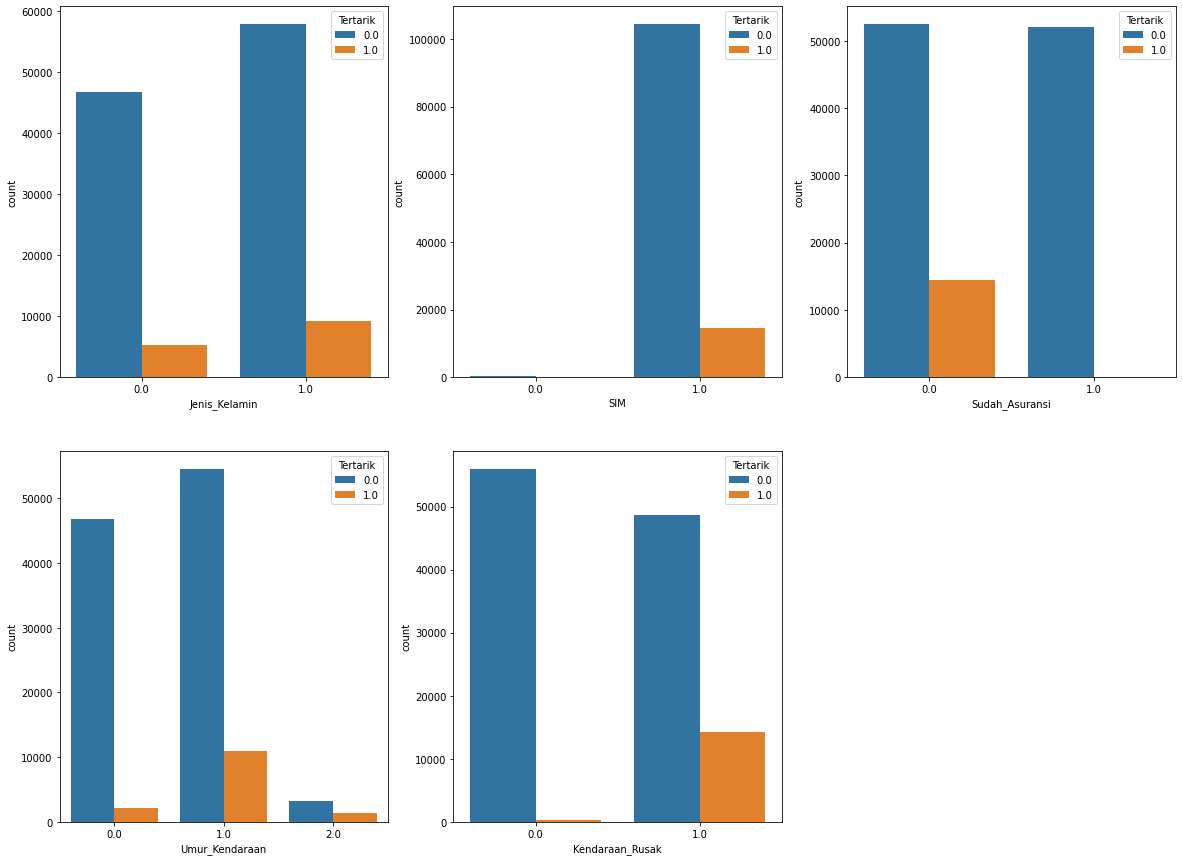

In [ ]:
# Visualization Data with Plot
# Menampilkan ketertarikan dari feature categorical
plt.figure(figsize=(20, 15))
for i,cat in enumerate(categorical_data):
    plt.subplot(2,3,i+1)
    sns.countplot(data = df_train, x= cat, hue = "Tertarik")
plt.show()

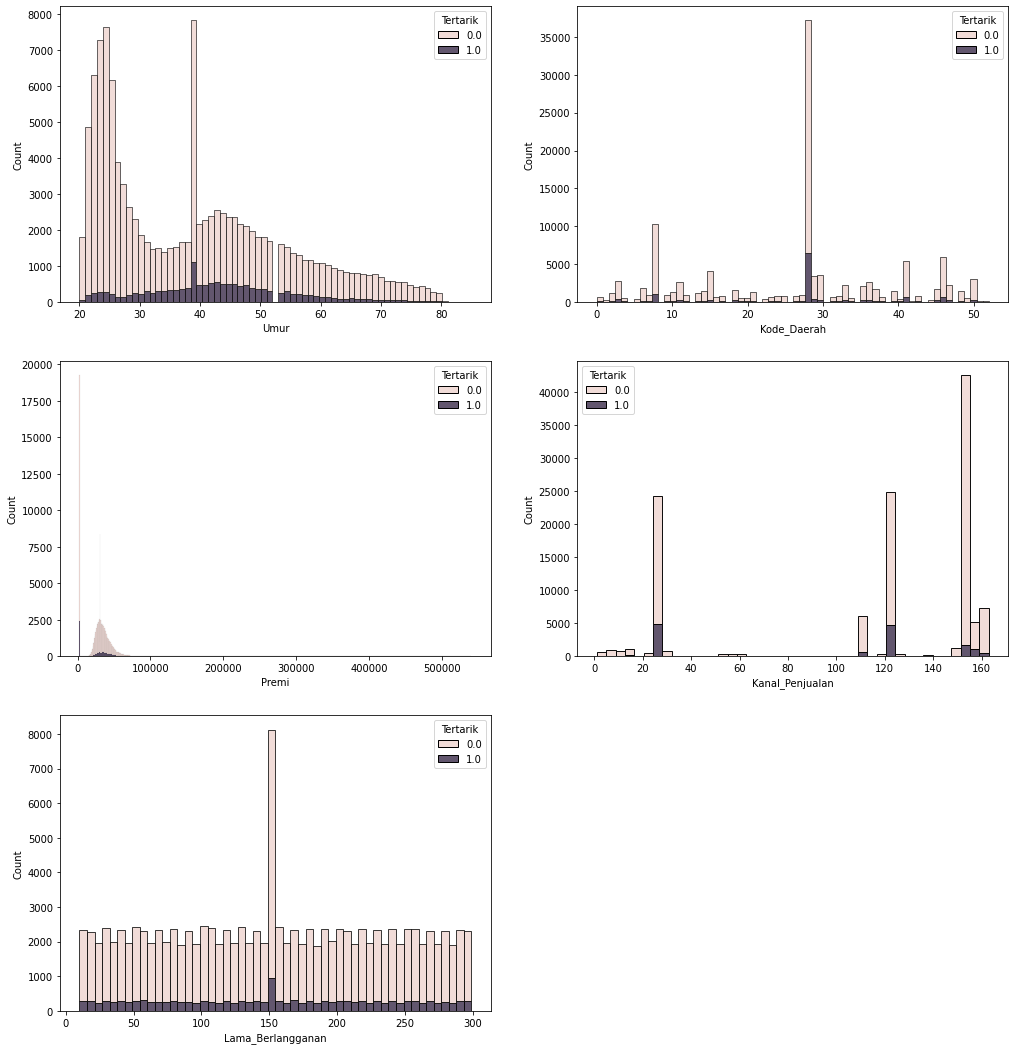

In [ ]:
# Menampilkan ketertarikan dari data coninuous
plt.figure(figsize=(17, 25))
for j,con in enumerate(continuous_data):
    plt.subplot(4, 2, j+1)
    sns.histplot(data = df_train, x= con, hue = "Tertarik", multiple="stack")
plt.show()

## Preprocessing data kendaraan_test

In [ ]:
# Preprocessing Data Testing
data_test = pd.read_csv("/kendaraan_test.csv")
data_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


In [ ]:
df_test = data_test

In [ ]:
to_number_value = {'Wanita': 0, 'Pria': 1}
df_test = df_test.replace({'Jenis_Kelamin': to_number_value})

to_number_value = {'Tidak': 0, 'Pernah': 1}
df_test = df_test.replace({'Kendaraan_Rusak': to_number_value})

to_number_value = {'< 1 Tahun': 0, '1-2 Tahun': 1, '> 2 Tahun': 2}
df_test = df_test.replace({'Umur_Kendaraan': to_number_value})

In [ ]:
df_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,49,1,8,0,1,1,46963,26,145,0
1,1,22,1,47,1,0,0,39624,152,241,0
2,1,24,1,28,1,0,0,110479,152,62,0
3,1,46,1,8,1,1,0,36266,124,34,0
4,1,35,1,23,0,1,1,26963,152,229,0


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Jenis_Kelamin      47639 non-null  int64
 1   Umur               47639 non-null  int64
 2   SIM                47639 non-null  int64
 3   Kode_Daerah        47639 non-null  int64
 4   Sudah_Asuransi     47639 non-null  int64
 5   Umur_Kendaraan     47639 non-null  int64
 6   Kendaraan_Rusak    47639 non-null  int64
 7   Premi              47639 non-null  int64
 8   Kanal_Penjualan    47639 non-null  int64
 9   Lama_Berlangganan  47639 non-null  int64
 10  Tertarik           47639 non-null  int64
dtypes: int64(11)
memory usage: 4.0 MB


## Mempersiapkan data train dan data test

In [ ]:
# Data Train x and y continu
x_train = df_train[continuous_data]
y_train = df_train['Tertarik']

# Data Test x and y continu
x_test = df_test[continuous_data]
y_test = df_test['Tertarik']

# Data Train x and y all feature
x_train_all_feature = df_train[all_feature_data]


# Data Test x and y all feature
x_test_all_feature = df_test[all_feature_data]

# x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.7, random_state=2)

## Data Scaling

In [ ]:
# Data scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled_all_feature = scaler.fit_transform(x_train_all_feature)
x_test_scaled_all_feature = scaler.transform(x_test_all_feature)



In [ ]:
x_train_scaled

In [ ]:
# Data Train and Test for SVM Model
df_train_scaled_split_x = np.array_split(x_train_scaled, 50)
df_train_scaled_split_y = np.array_split(y_train, 50)

df_test_scaled_split_x = np.array_split(x_test_scaled, 7)
df_test_scaled_split_y = np.array_split(y_test, 7)

print(len(df_train_scaled_split_x[0]))
print(len(df_train_scaled_split_y[0]))

print(len(df_test_scaled_split_x[0]))
print(len(df_test_scaled_split_y[0]))

# Pemodelan


In [ ]:
# Make class Naive Bayes models from Scratch
class NaiveBayesScratch:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


# Evaluasi


In [ ]:
# Variabel Accuracy List
accuracy_list = []
accuracy_listNB = []

In [ ]:
# Model Naive Bayes Library
# nb_model = GaussianNB()
# nb_model.fit(x_train_scaled, y_train)
# nb_prediction = nb_model.predict(x_test_scaled)
# nb_accuracy = (round(accuracy_score(nb_prediction, y_test), 4) * 100) #percentage
# accuracy_list.append(nb_accuracy)
# accuracy_listNB.append(nb_accuracy)


# # Model Naive Bayes from Scratch for continu data
nb_model = NaiveBayesScratch()
nb_model.fit(x_train_scaled, y_train)
nb_prediction = nb_model.predict(x_test_scaled)
nb_accuracy = (round(accuracy_score(nb_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(nb_accuracy)
accuracy_listNB.append(nb_accuracy)


In [ ]:
#Model Naive Bayes Library for all feature
# nb_model_all_feature = GaussianNB()
# nb_model_all_feature.fit(x_train_scaled_all_feature, y_train)
# nb_prediction_all_feature = nb_model_all_feature.predict(x_test_scaled_all_feature)
# nb_accuracy_all_feature = (round(accuracy_score(nb_prediction_all_feature, y_test), 4) * 100) #percentage
# accuracy_list.append(nb_accuracy_all_feature)
# accuracy_listNB.append(nb_accuracy_all_feature)

# Model Naive Bayes from Scratch for all feature data
nb_model_all_feature = NaiveBayesScratch()
nb_model_all_feature.fit(x_train_scaled_all_feature, y_train)
nb_prediction_all_feature = nb_model_all_feature.predict(x_test_scaled_all_feature)
nb_accuracy_all_feature = (round(accuracy_score(nb_prediction_all_feature, y_test), 4) * 100) #percentage
accuracy_list.append(nb_accuracy_all_feature)
accuracy_listNB.append(nb_accuracy_all_feature)

In [ ]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x= ["Naive Bayes Continuous data", "Naive Bayes All Feature data"], y=accuracy_listNB)
plt.xlabel("Classifiers", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y+ height*1.01), ha="center")
plt.show()

# Eksperimen


In [ ]:
# Model Decison Tree Library
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=2)
dt_model.fit(x_train_scaled, y_train)
dt_prediction = dt_model.predict(x_test_scaled)
dt_accuracy = (round(accuracy_score(dt_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(dt_accuracy)

In [ ]:
# Model Random Forest Library
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train)
rf_prediction = rf_model.predict(x_test_scaled)
rf_accuracy = (round(accuracy_score(rf_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(rf_accuracy)

In [ ]:
# Model Support Vector Machine Library
svc_model = SVC()
svc_model.fit(df_train_scaled_split_x[0], df_train_scaled_split_y[0])
svc_prediction = svc_model.predict(df_test_scaled_split_x[0])
svc_accuracy = (round(accuracy_score(svc_prediction, df_test_scaled_split_y[0]), 4) * 100) #percentage
accuracy_list.append(svc_accuracy)

# Perbandingan Akurasi


In [ ]:
accuracy_list

In [ ]:
models = ["Naive Bayes", "Naive Bayes All feature", "Decision Tree", "Random Forest", "SVC"]

In [ ]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=models, y=accuracy_list)
plt.xlabel("Classifiers", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y+ height*1.01), ha="center")
plt.show()

# Kesimpulan
- Nilai akurasi model Naive Bayes continu data = 87.56%
-Nilai akurasi model Naive Bayes All Feature data = 64.19%
-Nilai akurasi model Decision tree = 87.7%
-Nilai akurasi model Random Forest = 86.61%
-Nilai akurasi model Support Vector Machine ( SVC) = 87.89%
